<a href="https://colab.research.google.com/github/BrianWengier/CAP4630/blob/master/hw2/AIHW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Underfit Model:

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 84s 2ms/sample - loss: 2.0296 - acc: 0.2198 - val_loss: 1.8962 - val_acc: 0.2794
Epoch 2/20
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.8536 - acc: 0.3173 - val_loss: 1.7587 - val_acc: 0.3485
Epoch 3/20
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.7745 - acc: 0.3553 - val_loss: 1.6931 - val_acc: 0.3806
Epoch 4/20
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.7214 - acc: 0.3730 - val_loss: 1.6385 - val_acc: 0.4096
Epoch 5/20
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.6767 - acc: 0.3966 - val_loss: 1.5837 - val_acc: 0.4259
Epoch 6/20
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.6406 - acc: 0.4067 - val_loss: 1.5613 - val_acc: 0.4393
Epoch 7/20
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.6061 - acc: 0.4192 - val_loss: 1.

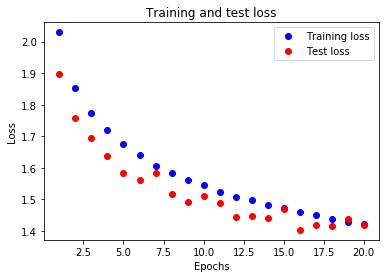

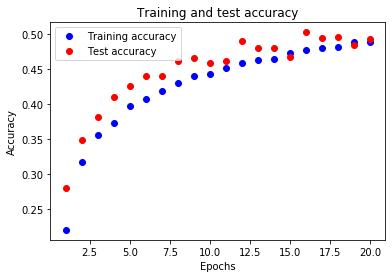

In [13]:
# set up the layers

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfit Model:

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Good Model:

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 458s 9ms/sample - loss: 2.3029 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 457s 9ms/sample - loss: 2.3028 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 455s 9ms/sample - loss: 2.3028 - acc: 0.0977 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 456s 9ms/sample - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/20
20224/50000 [===========>..................] - ETA: 4:22 - loss: 2.3028 - acc: 0.0957